In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
res = pd.read_csv('Quality of Service 5G.csv')

In [3]:
n_res = res.copy()

In [4]:
res

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


In [5]:
res.isnull().any()

Timestamp              False
User_ID                False
Application_Type       False
Signal_Strength        False
Latency                False
Required_Bandwidth     False
Allocated_Bandwidth    False
Resource_Allocation    False
dtype: bool

In [6]:
head = res.head()
print(head)

        Timestamp User_ID   Application_Type Signal_Strength Latency  \
0  9/3/2023 10:00  User_1         Video_Call         -75 dBm   30 ms   
1  9/3/2023 10:00  User_2         Voice_Call         -80 dBm   20 ms   
2  9/3/2023 10:00  User_3          Streaming         -85 dBm   40 ms   
3  9/3/2023 10:00  User_4  Emergency_Service         -70 dBm   10 ms   
4  9/3/2023 10:00  User_5      Online_Gaming         -78 dBm   25 ms   

  Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
0            10 Mbps             15 Mbps                 70%  
1           100 Kbps            120 Kbps                 80%  
2             5 Mbps              6 Mbps                 75%  
3             1 Mbps            1.5 Mbps                 90%  
4             2 Mbps              3 Mbps                 85%  


In [7]:
description = res.describe()
print(description)

             Timestamp User_ID Application_Type Signal_Strength Latency  \
count              400     400              400             400     400   
unique               7     400               11              84      87   
top     9/3/2023 10:01  User_1       Video_Call         -97 dBm    5 ms   
freq                60       1               58               9      35   

       Required_Bandwidth Allocated_Bandwidth Resource_Allocation  
count                 400                 400                 400  
unique                188                 194                   9  
top              0.1 Mbps            0.1 Mbps                 70%  
freq                   16                  16                 148  


In [8]:
print(res.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB
None


checking the datatype of each column


In [9]:
res.dtypes

Timestamp              object
User_ID                object
Application_Type       object
Signal_Strength        object
Latency                object
Required_Bandwidth     object
Allocated_Bandwidth    object
Resource_Allocation    object
dtype: object

converting the datatypes of the all columns to numeric type

In [10]:
n_res['Timestamp'] = res['Timestamp']
n_res['User_ID'] = res['User_ID']
n_res['Application_Type'] = res['Application_Type']
n_res['Signal_Strength'] = res['Signal_Strength'].str.extract('(-\d+)').astype(int)
n_res['Latency'] = res['Latency'].str.extract('(\d+)').astype(int)
n_res['Required_Bandwidth'] = res['Required_Bandwidth'].str.extract('(\d+)').astype(float)
n_res['Allocated_Bandwidth'] = res['Allocated_Bandwidth'].str.extract('(\d+)').astype(float)
n_res['Resource_Allocation'] = res['Resource_Allocation'].str.extract('(\d+)').astype(int)


In [11]:
print(n_res)

          Timestamp   User_ID   Application_Type  Signal_Strength  Latency  \
0    9/3/2023 10:00    User_1         Video_Call              -75       30   
1    9/3/2023 10:00    User_2         Voice_Call              -80       20   
2    9/3/2023 10:00    User_3          Streaming              -85       40   
3    9/3/2023 10:00    User_4  Emergency_Service              -70       10   
4    9/3/2023 10:00    User_5      Online_Gaming              -78       25   
..              ...       ...                ...              ...      ...   
395  9/3/2023 10:06  User_396          Streaming             -110       61   
396  9/3/2023 10:06  User_397         Video_Call              -40       53   
397  9/3/2023 10:06  User_398    Video_Streaming             -113       58   
398  9/3/2023 10:06  User_399  Emergency_Service              -40        5   
399  9/3/2023 10:06  User_400       Web_Browsing             -113        0   

     Required_Bandwidth  Allocated_Bandwidth  Resource_Allocati

In [12]:
print(n_res.dtypes)

Timestamp               object
User_ID                 object
Application_Type        object
Signal_Strength          int32
Latency                  int32
Required_Bandwidth     float64
Allocated_Bandwidth    float64
Resource_Allocation      int32
dtype: object


In [13]:
n_res['Date'] = pd.to_datetime(n_res['Timestamp']).dt.date
n_res['Time'] = pd.to_datetime(n_res['Timestamp']).dt.time
#extracting the Date and time from Timestamp column

In [14]:
n_res

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Date,Time
0,9/3/2023 10:00,User_1,Video_Call,-75,30,10.0,15.0,70,2023-09-03,10:00:00
1,9/3/2023 10:00,User_2,Voice_Call,-80,20,100.0,120.0,80,2023-09-03,10:00:00
2,9/3/2023 10:00,User_3,Streaming,-85,40,5.0,6.0,75,2023-09-03,10:00:00
3,9/3/2023 10:00,User_4,Emergency_Service,-70,10,1.0,1.0,90,2023-09-03,10:00:00
4,9/3/2023 10:00,User_5,Online_Gaming,-78,25,2.0,3.0,85,2023-09-03,10:00:00
...,...,...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110,61,1.0,1.0,85,2023-09-03,10:06:00
396,9/3/2023 10:06,User_397,Video_Call,-40,53,14.0,15.0,75,2023-09-03,10:06:00
397,9/3/2023 10:06,User_398,Video_Streaming,-113,58,1.0,1.0,70,2023-09-03,10:06:00
398,9/3/2023 10:06,User_399,Emergency_Service,-40,5,0.0,0.0,70,2023-09-03,10:06:00


In [15]:
n_res.drop('Timestamp',axis=1) #dropping Timestamp column 

,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Date,Time
0,User_1,Video_Call,-75,30,10.0,15.0,70,2023-09-03,10:00:00
1,User_2,Voice_Call,-80,20,100.0,120.0,80,2023-09-03,10:00:00
2,User_3,Streaming,-85,40,5.0,6.0,75,2023-09-03,10:00:00
3,User_4,Emergency_Service,-70,10,1.0,1.0,90,2023-09-03,10:00:00
4,User_5,Online_Gaming,-78,25,2.0,3.0,85,2023-09-03,10:00:00
...,...,...,...,...,...,...,...,...,...
395,User_396,Streaming,-110,61,1.0,1.0,85,2023-09-03,10:06:00
396,User_397,Video_Call,-40,53,14.0,15.0,75,2023-09-03,10:06:00
397,User_398,Video_Streaming,-113,58,1.0,1.0,70,2023-09-03,10:06:00
398,User_399,Emergency_Service,-40,5,0.0,0.0,70,2023-09-03,10:06:00


In [16]:
scaler = StandardScaler()
n_res[['Signal_Strength', 'Latency']] = scaler.fit_transform(n_res[['Signal_Strength', 'Latency']])

In [17]:
n_res

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Date,Time
0,9/3/2023 10:00,User_1,Video_Call,0.265777,-0.181316,10.0,15.0,70,2023-09-03,10:00:00
1,9/3/2023 10:00,User_2,Voice_Call,0.023942,-0.655346,100.0,120.0,80,2023-09-03,10:00:00
2,9/3/2023 10:00,User_3,Streaming,-0.217894,0.292713,5.0,6.0,75,2023-09-03,10:00:00
3,9/3/2023 10:00,User_4,Emergency_Service,0.507612,-1.129376,1.0,1.0,90,2023-09-03,10:00:00
4,9/3/2023 10:00,User_5,Online_Gaming,0.120676,-0.418331,2.0,3.0,85,2023-09-03,10:00:00
...,...,...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-1.427070,1.288176,1.0,1.0,85,2023-09-03,10:06:00
396,9/3/2023 10:06,User_397,Video_Call,1.958624,0.908952,14.0,15.0,75,2023-09-03,10:06:00
397,9/3/2023 10:06,User_398,Video_Streaming,-1.572171,1.145967,1.0,1.0,70,2023-09-03,10:06:00
398,9/3/2023 10:06,User_399,Emergency_Service,1.958624,-1.366391,0.0,0.0,70,2023-09-03,10:06:00


In [18]:
n_res['Utilization_ratio'] = n_res['Allocated_Bandwidth']/n_res['Required_Bandwidth']

In [19]:
n_res

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Date,Time,Utilization_ratio
0,9/3/2023 10:00,User_1,Video_Call,0.265777,-0.181316,10.0,15.0,70,2023-09-03,10:00:00,1.500000
1,9/3/2023 10:00,User_2,Voice_Call,0.023942,-0.655346,100.0,120.0,80,2023-09-03,10:00:00,1.200000
2,9/3/2023 10:00,User_3,Streaming,-0.217894,0.292713,5.0,6.0,75,2023-09-03,10:00:00,1.200000
3,9/3/2023 10:00,User_4,Emergency_Service,0.507612,-1.129376,1.0,1.0,90,2023-09-03,10:00:00,1.000000
4,9/3/2023 10:00,User_5,Online_Gaming,0.120676,-0.418331,2.0,3.0,85,2023-09-03,10:00:00,1.500000
...,...,...,...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-1.427070,1.288176,1.0,1.0,85,2023-09-03,10:06:00,1.000000
396,9/3/2023 10:06,User_397,Video_Call,1.958624,0.908952,14.0,15.0,75,2023-09-03,10:06:00,1.071429
397,9/3/2023 10:06,User_398,Video_Streaming,-1.572171,1.145967,1.0,1.0,70,2023-09-03,10:06:00,1.000000
398,9/3/2023 10:06,User_399,Emergency_Service,1.958624,-1.366391,0.0,0.0,70,2023-09-03,10:06:00,NaN


In [20]:
n_res.isnull().any

<bound method DataFrame.any of      Timestamp  User_ID  Application_Type  Signal_Strength  Latency  \
0        False    False             False            False    False   
1        False    False             False            False    False   
2        False    False             False            False    False   
3        False    False             False            False    False   
4        False    False             False            False    False   
..         ...      ...               ...              ...      ...   
395      False    False             False            False    False   
396      False    False             False            False    False   
397      False    False             False            False    False   
398      False    False             False            False    False   
399      False    False             False            False    False   

     Required_Bandwidth  Allocated_Bandwidth  Resource_Allocation   Date  \
0                 False                F

In [21]:
n_res['Utilization_ratio'] = n_res['Utilization_ratio'].replace([np.inf, -np.inf], np.nan)

In [22]:
#n_res['Utilization_ratio'].fillna(n_res['Utilization_ratio'].mean(), inplace=True)
n_res['Utilization_ratio'].fillna(0, inplace=True)

In [23]:
n_res

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Date,Time,Utilization_ratio
0,9/3/2023 10:00,User_1,Video_Call,0.265777,-0.181316,10.0,15.0,70,2023-09-03,10:00:00,1.500000
1,9/3/2023 10:00,User_2,Voice_Call,0.023942,-0.655346,100.0,120.0,80,2023-09-03,10:00:00,1.200000
2,9/3/2023 10:00,User_3,Streaming,-0.217894,0.292713,5.0,6.0,75,2023-09-03,10:00:00,1.200000
3,9/3/2023 10:00,User_4,Emergency_Service,0.507612,-1.129376,1.0,1.0,90,2023-09-03,10:00:00,1.000000
4,9/3/2023 10:00,User_5,Online_Gaming,0.120676,-0.418331,2.0,3.0,85,2023-09-03,10:00:00,1.500000
...,...,...,...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-1.427070,1.288176,1.0,1.0,85,2023-09-03,10:06:00,1.000000
396,9/3/2023 10:06,User_397,Video_Call,1.958624,0.908952,14.0,15.0,75,2023-09-03,10:06:00,1.071429
397,9/3/2023 10:06,User_398,Video_Streaming,-1.572171,1.145967,1.0,1.0,70,2023-09-03,10:06:00,1.000000
398,9/3/2023 10:06,User_399,Emergency_Service,1.958624,-1.366391,0.0,0.0,70,2023-09-03,10:06:00,0.000000


In [24]:



new_res = n_res.drop(['Timestamp','User_ID','Date','Time'] ,axis=1)


In [25]:
seg_n_res = n_res.groupby('Application_Type')

In [26]:
f_value, p_value = stats.f_oneway(*[group['Resource_Allocation'].values for name, group in seg_n_res])
print(f"F-values:{f_value}, P-Value: {p_value}")

F-values:435.5218983437554, P-Value: 2.4041349903988285e-204


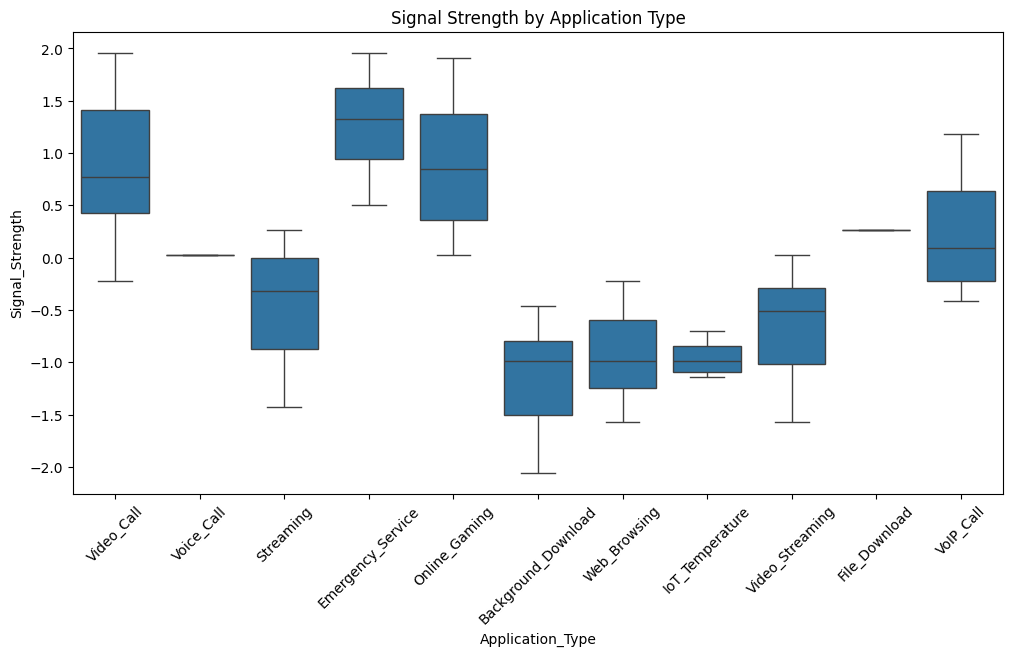

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', data=n_res)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

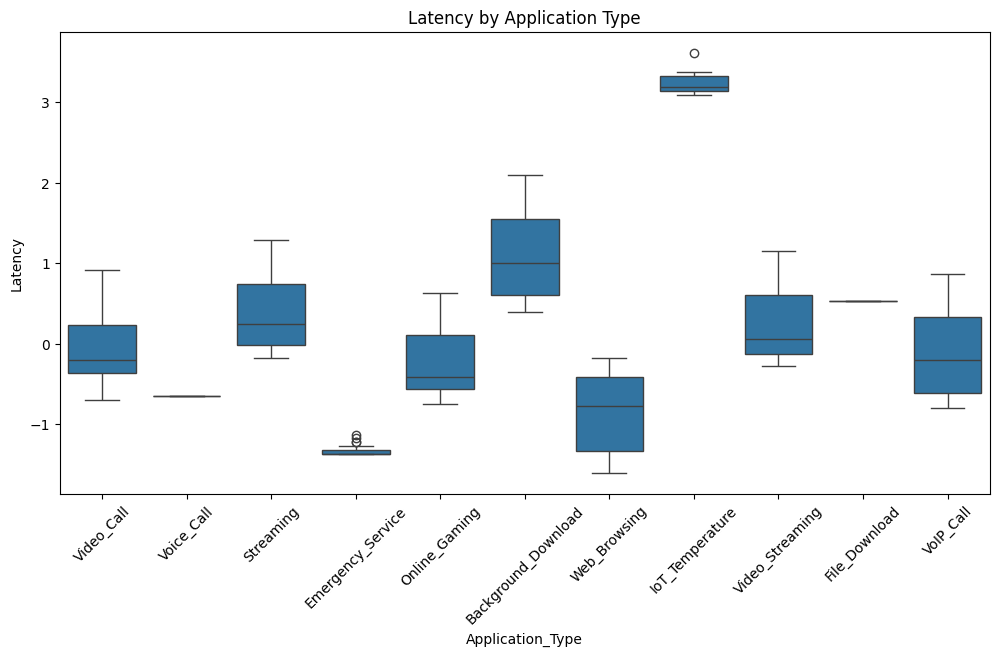

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', data=n_res)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

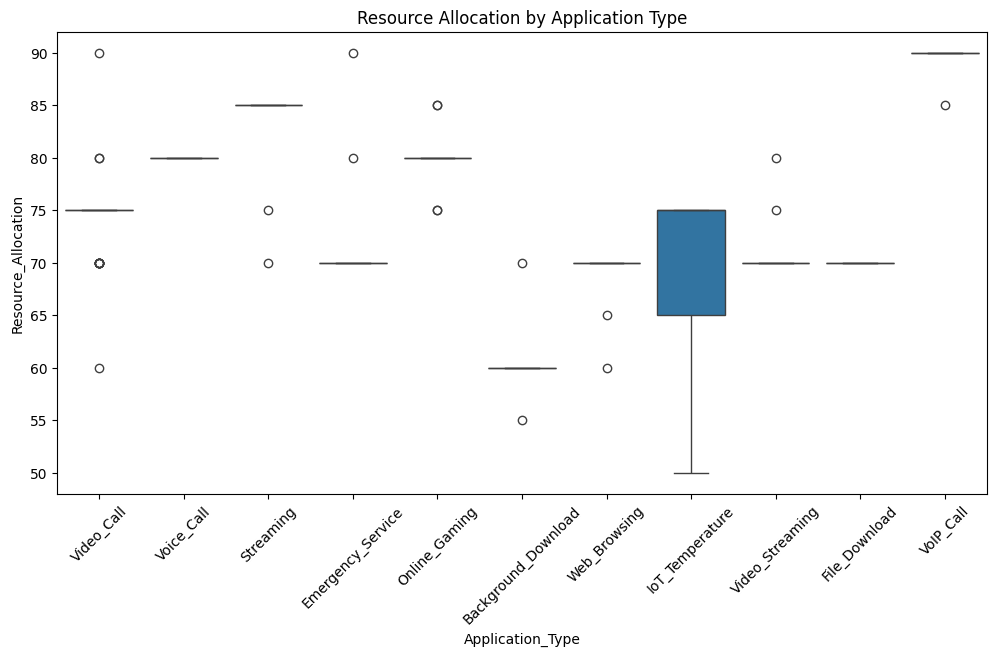

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Resource_Allocation', data=n_res)
plt.title('Resource Allocation by Application Type')
plt.xticks(rotation=45)
plt.show()

In [30]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#new_res['Application_Type_label'] = label_encoder.fit_transform(new_res['Application_Type'])


In [31]:
new_res

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Utilization_ratio
0,Video_Call,0.265777,-0.181316,10.0,15.0,70,1.500000
1,Voice_Call,0.023942,-0.655346,100.0,120.0,80,1.200000
2,Streaming,-0.217894,0.292713,5.0,6.0,75,1.200000
3,Emergency_Service,0.507612,-1.129376,1.0,1.0,90,1.000000
4,Online_Gaming,0.120676,-0.418331,2.0,3.0,85,1.500000
...,...,...,...,...,...,...,...
395,Streaming,-1.427070,1.288176,1.0,1.0,85,1.000000
396,Video_Call,1.958624,0.908952,14.0,15.0,75,1.071429
397,Video_Streaming,-1.572171,1.145967,1.0,1.0,70,1.000000
398,Emergency_Service,1.958624,-1.366391,0.0,0.0,70,0.000000


In [44]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(new_res[['Application_Type']])
categories = onehot_encoder.categories_[0]
encoded_df = pd.DataFrame(encoded_data, columns=[f'Application_Type_{category}' for category in categories])


new_res_encoded = pd.concat([new_res.drop('Application_Type', axis=1), encoded_df], axis=1)


D:\dlml\deeplearing\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
new_res_encoded


,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Utilization_ratio,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing
0,0.265777,-0.181316,10.0,15.0,70,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.023942,-0.655346,100.0,120.0,80,1.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.217894,0.292713,5.0,6.0,75,1.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.507612,-1.129376,1.0,1.0,90,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.120676,-0.418331,2.0,3.0,85,1.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.427070,1.288176,1.0,1.0,85,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
396,1.958624,0.908952,14.0,15.0,75,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
397,-1.572171,1.145967,1.0,1.0,70,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,1.958624,-1.366391,0.0,0.0,70,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
file_path = 'data.csv'
#converting n_res data to csv file 
new_res_encoded.to_csv(file_path,index=False)

In [47]:
X = new_res_encoded.drop(['Resource_Allocation'], axis=1)
Y = new_res_encoded['Resource_Allocation'].values

In [48]:
print(X)

     Signal_Strength   Latency  Required_Bandwidth  Allocated_Bandwidth  \
0           0.265777 -0.181316                10.0                 15.0   
1           0.023942 -0.655346               100.0                120.0   
2          -0.217894  0.292713                 5.0                  6.0   
3           0.507612 -1.129376                 1.0                  1.0   
4           0.120676 -0.418331                 2.0                  3.0   
..               ...       ...                 ...                  ...   
395        -1.427070  1.288176                 1.0                  1.0   
396         1.958624  0.908952                14.0                 15.0   
397        -1.572171  1.145967                 1.0                  1.0   
398         1.958624 -1.366391                 0.0                  0.0   
399        -1.572171 -1.603406                 0.0                  0.0   

     Utilization_ratio  Application_Type_Background_Download  \
0             1.500000             

In [49]:
from sklearn.utils.validation import column_or_1d
y= column_or_1d(Y, warn=True)

Splitting the dataset in to train and test dataset

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 16)
(120, 16)
(280,)
(120,)


In [52]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [53]:
y_pred = svm_model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8916666666666667


random forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [56]:
# Train the model
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Make predictions
y_pred = random_forest_model.predict(x_test)

In [58]:
# Evaluate the model
accuracy = random_forest_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8559277654164017


Cross-validation scores: [0.59363784 0.92359412 0.99894054 0.99996154 0.92466385]
Mean cross-validation score: 0.8881595755547528


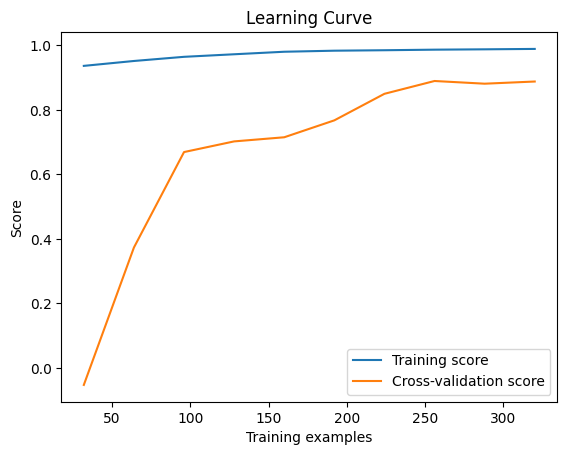

In [59]:
from sklearn.model_selection import cross_val_score, learning_curve
cv_scores = cross_val_score(random_forest_model, X, y, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

linear regresssion

In [60]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
linear_model = LinearRegression()



In [61]:
# Train the model
linear_model.fit(x_train, y_train)



LinearRegression()

In [62]:
# Make predictions
y_pred = linear_model.predict(x_test)



In [63]:
# Evaluate the model
score = linear_model.score(x_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.8565404250006257


desicion tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()


In [65]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dt_classifier.predict(x_test)


In [67]:
accuracy = dt_classifier.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.875


By comparing all this algorithm SVC and Decision tree classier have more accuracy so we choose SVC as it can be use for more complex data over Decision tree clasifier